In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.shape

(237, 4)

In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
import matplotlib.pyplot as plt

In [6]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

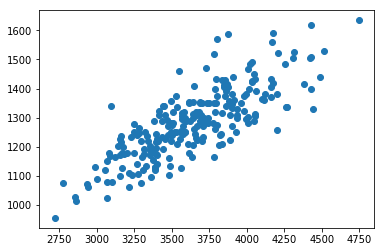

In [7]:
plt.scatter(X,y)

In [8]:
mean_x = np.mean(X)
mean_y = np.mean(y)

numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer/denom
intercept = mean_y - slope * mean_x

In [9]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

In [10]:
from scipy.stats import linregress

In [11]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [12]:
predictions = []
for i in range(len(X)):
    y_pred = slope * X[i] + intercept
    predictions.append(y_pred)

In [13]:
print(predictions[:10])

[1514.1666008256125, 1310.2722920608173, 1448.0458366137732, 1320.546036300904, 1425.9177720966638, 1269.9676031189392, 1322.6534710168191, 1263.118440292215, 1277.3436246246424, 1374.549050896231]


In [14]:
for i in range(10):
    print("Actual : {}, Predicted : {}".format(y[i], int(predictions[i])))

Actual : 1530, Predicted : 1514
Actual : 1297, Predicted : 1310
Actual : 1335, Predicted : 1448
Actual : 1282, Predicted : 1320
Actual : 1590, Predicted : 1425
Actual : 1300, Predicted : 1269
Actual : 1400, Predicted : 1322
Actual : 1255, Predicted : 1263
Actual : 1355, Predicted : 1277
Actual : 1375, Predicted : 1374


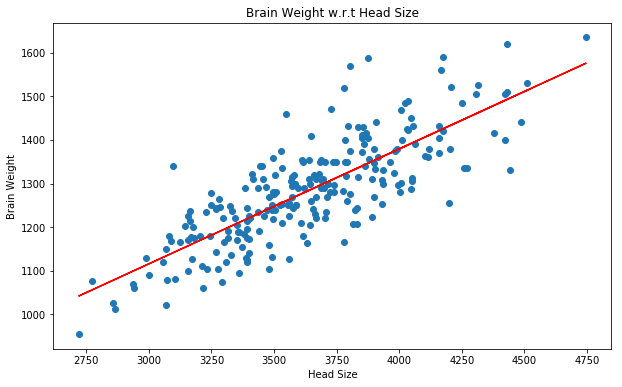

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'r')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title("Brain Weight w.r.t Head Size")
plt.show()

In [16]:
numer = 0
for i in range(len(y)):
    numer += (y[i] - predictions[i]) ** 2

mse = numer / len(X)

In [17]:
mse

5201.38402800233

In [18]:
rmse = np.sqrt(mse)

In [19]:
rmse

72.1206213783709

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


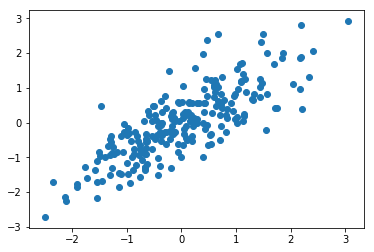

In [23]:
plt.scatter(X,y)

In [29]:
slope = 0
intercept = 0

epochs = 10000
alpha = 0.003
n = len(y)

for i in range(epochs):
    y_pred = slope * X + intercept
    D_slope = (-2/n) * sum(X * (y - y_pred))
    D_intercept = (-2/n) * sum(y - y_pred)
    slope = slope - alpha * D_slope
    intercept = intercept - alpha * D_intercept
#     print(slope, intercept)

print(slope, intercept)

[0.79956971] [-3.05246686e-16]


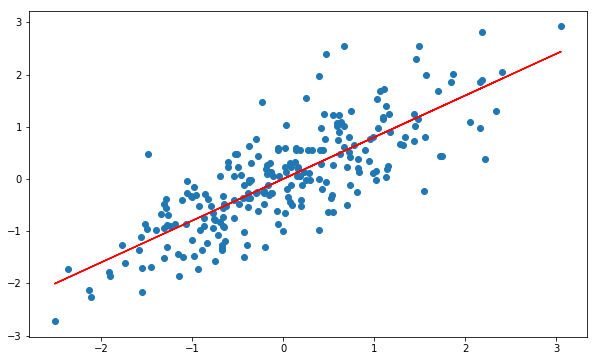

In [30]:
predictions = X*slope + intercept

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')

In [31]:
predictions[0]

array([1.92605812])

In [32]:
pred = sc.inverse_transform(predictions)

In [33]:
pred[0]

array([1514.16660083])

In [57]:
slope = 0
intercept = 0

In [80]:
y_pred = slope * X + intercept

In [81]:
D_slope = (-2/n) * sum(X * (y - y_pred))

In [82]:
D_slope

array([-1.58956376])

In [83]:
D_intercept = (-2/n) * sum(y - y_pred)

In [84]:
D_intercept

array([-3.18545003e-17])

In [85]:
slope = slope - alpha * D_slope
intercept = intercept - alpha * D_intercept

In [86]:
slope, intercept

(array([0.00637739]), array([-2.88564297e-19]))